In [77]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df=pd.read_csv(r'Elon_musk.csv',encoding='cp1252')

In [3]:
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df.Text

0                                  @kunalb11 I’m an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [6]:
df_1 = [x.strip() for x in df.Text] # remove both the leading and the trailing characters
df_2 = [x for x in df_1 if x] # removes empty strings, because they are considered in Python as False
df_2[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

# Removing the punctuation

In [54]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x) 


In [55]:
df['text'] = df.Text.apply(clean)

In [56]:
df['text']

0                                             im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: text, Length: 1999, dtype: object

In [57]:
df

,Unnamed: 0,Text,text
0,1,@kunalb11 I’m an alien,im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...
...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is


# removing stopwords

In [58]:
stop_word = pd.read_csv(r'stop.txt', header=None)

In [59]:
st_word = [i for i in stop_word[0]]

In [62]:
#removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
my_stop_words = stop.copy()
#add some more stop words
for i in st_word:
    my_stop_words.append(i)  
print(len(my_stop_words))
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stop_words))

750


In [63]:
df['text']

0                                                im alien
1         idaacarmack ray tracing cyberpunk hdr nextlevel
2                        joerogan spotify great interview
3                                     doge underestimated
4       teslacn congratulations tesla china amazing ex...
                              ...                        
1994    flcnhvy true sounds surreal negative propagand...
1995    ppathole make read ur terms amp conditions cli...
1996                    teslagong ppathole samwise gamgee
1997                           ppathole altho dumb dumber
1998                               progress update august
Name: text, Length: 1999, dtype: object

In [66]:
#importig the lab 
#!pip install textblob
from textblob import TextBlob

In [72]:
df[['polarity', 'subjectivity']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [74]:
TextBlob(df['text'][2]).sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [75]:
df

,Unnamed: 0,Text,text,polarity,subjectivity
0,1,@kunalb11 I’m an alien,im alien,-0.250000,0.750000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,0.000000,0.000000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000,0.750000
3,4,@gtera27 Doge is underestimated,doge underestimated,0.000000,0.000000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,0.600000,0.900000
...,...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true sounds surreal negative propagand...,0.111111,0.508333
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathole make read ur terms amp conditions cli...,0.000000,0.000000
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,0.000000,0.000000
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb dumber,-0.375000,0.500000


In [93]:
for index, row in df['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        df.loc[index, 'sentiment'] = 'positive'
    else:
        df.loc[index, 'sentiment'] = 'neutral'
    df.loc[index, 'neg'] = neg
    df.loc[index, 'neu'] = neu
    df.loc[index, 'pos'] = pos
    df.loc[index, 'compound'] = comp

In [80]:
import nltk
nltk.download('vader_lexicon')
x=SentimentIntensityAnalyzer().polarity_scores(df['text'][2])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [91]:
x=SentimentIntensityAnalyzer().polarity_scores(df['text'][4])
#{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}
#x['pos']
df['text'][4]

'teslacn congratulations tesla china amazing execution year'

In [92]:
x

{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'compound': 0.8271}

In [94]:
df

,Unnamed: 0,Text,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,1,@kunalb11 I’m an alien,im alien,-0.250000,0.750000,neutral,0.000,1.000,0.000,0.0000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,0.800000,0.750000,positive,0.000,0.423,0.577,0.6249
3,4,@gtera27 Doge is underestimated,doge underestimated,0.000000,0.000000,negative,0.677,0.323,0.000,-0.2732
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,0.600000,0.900000,positive,0.000,0.394,0.606,0.8271
...,...,...,...,...,...,...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true sounds surreal negative propagand...,0.111111,0.508333,neutral,0.328,0.345,0.328,-0.0000
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathole make read ur terms amp conditions cli...,0.000000,0.000000,positive,0.000,0.755,0.245,0.3818
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb dumber,-0.375000,0.500000,negative,0.744,0.256,0.000,-0.7003


In [99]:
list_positive = df[df['sentiment']== 'positive']
list_negative = df[df['sentiment']== 'negative']
list_neutral = df[df['sentiment']== 'neutral']
data= pd.DataFrame(list_positive, list_negative, list_neutral,) # columns=[list_positive,list_negative,list_neutral])

In [101]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(df,'sentiment')

,Total,Percentage
neutral,1116,55.83
positive,681,34.07
negative,202,10.11


In [120]:
#df.loc[:,'sentiment'].value_counts(dropna=False) neutral===1116 positive===681  negative===202
y=count_values_in_column(df,'sentiment')
y['Percentage']


neutral     55.83
positive    34.07
negative    10.11
Name: Percentage, dtype: float64

In [104]:
#x=df.sentiment.value_counts()

In [109]:
#x[1]/(x[0]+x[1]+x[2])*100     34.06703351675838

34.06703351675838

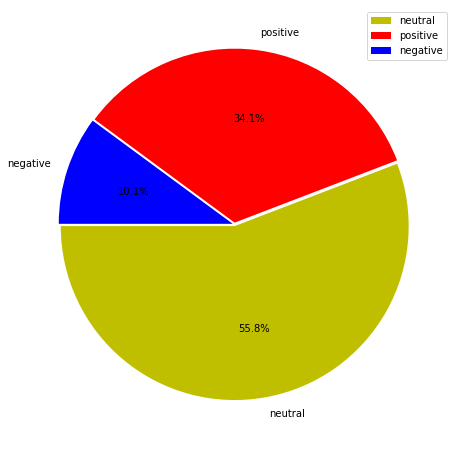

In [138]:
import matplotlib.pyplot as plt
y =count_values_in_column(df,'sentiment')
y=y['Total']
plt.figure(figsize=(8,8))
mylabels = ["neutral", "positive", "negative",]

plt.pie(y, labels = mylabels, startangle=180,colors=['y','r','b'],autopct='%1.1f%%',explode=[0.01, 0.01, 0.01])
plt.legend()
plt.show() 

# tokenization

In [160]:
from nltk.tokenize import  word_tokenize
text_1= [x.strip() for x in df.text] # remove both the leading and the trailing characters
text_2= [x for x in text_1 if x] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
text_3 = ' '.join(text_2)
len(text_3)


94258

In [161]:
df_token= word_tokenize(text_3)

In [164]:
df_token

['im',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'year',
 'happy',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'thought',
 'fail',
 'httpstcozgxjfdzzrm',
 'owensparks',
 'flcnhvy',
 'haha',
 'flcnhvy',
 'tweets',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertaining',
 'outcome',
 'givedirectly',
 'agree',
 'clubhouse',
 'kanyewest',
 'geoffkeighley',
 'unrealengine',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'joshmanmode',
 'issues',
 'sentencing',
 'bit',
 'high',
 'freewalletorg',
 'fixing',
 'freewalletorg',
 'unlock',
 'account',
 'astrojordy',
 'true',
 'power',
 'haha',
 'freewalletorg',
 'crypto',
 'wallet',
 'wont',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'freewalletorg',
 'app',
 'sucks',
 'rt',
 'spacex',
 'nasa',
 'selected',
 'falcon',

In [166]:
#Noramalize the data
lower_words = [x.lower() for x in df_token]
print(lower_words[0:25])

['im', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year', 'ox', 'frodo']


In [167]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['im', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotifi', 'great', 'interview', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'year', 'happi', 'year', 'ox', 'frodo', 'underdog', 'thought', 'fail', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'haha', 'flcnhvi', 'tweet', 'repres', 'realworld', 'time', 'alloc', 'entertain', 'outcom']


In [168]:
#removing stop words
no_stop_stemmed= [word for word in stemmed_tokens if not word in my_stop_words]

In [171]:
print(len(stemmed_tokens))
print(len(no_stop_stemmed))

11408
11312


In [173]:
# NLP english language model of spacy library
import spacy

nlp = spacy.load('en_core_web_sm')

In [175]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_stemmed))
print(doc[0:40])

im alien idaacarmack ray trace cyberpunk hdr nextlevel joerogan spotifi great interview doge underestim teslacn congratul tesla china amaz execut year happi year ox frodo underdog thought fail httpstcozgxjfdzzrm owenspark flcnhvi haha flcnhvi tweet repres realworld time alloc entertain


In [176]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['I', 'm', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotifi', 'great', 'interview', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'year', 'happi', 'year', 'ox']


# Feature Extraction

In [177]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
X

<11403x3510 sparse matrix of type '<class 'numpy.int64'>'
	with 11335 stored elements in Compressed Sparse Row format>

In [180]:
X.shape

(11403, 3510)

In [179]:
count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
count_vect_df.head()

,aber,abo,aboard,abort,absenc,absolut,absorb,absorpt,absurd,absurdli,...,zenit,zikryzamir,zogfotpik,zon,zone,zshauladventur,zubinanari,zwiebelbach,zzcool,ðogecoin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# N_gram

In [184]:
#Bi-gram
def get_top_n2_words(corpus,ngram_range, n=None):
    vec1 = CountVectorizer(ngram_range=ngram_range,  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [182]:
top2_words = get_top_n2_words(df["text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,rt nasa,12
4,waemd spacex,11


In [185]:
get_top_n2_words(df["text"],ngram_range=(3,3), n=200) #trigram

[('rt spacex falcon', 17),
 ('spacex falcon stage', 8),
 ('thesheetztweetz waemd spacex', 8),
 ('ppathole thesheetztweetz waemd', 7),
 ('waemd spacex spacexstarlink', 7),
 ('falcon stage landed', 6),
 ('rt spacex liftoff', 6),
 ('spacex spacexstarlink wanationalguard', 6),
 ('spacex felixschlang marcushousegame', 5),
 ('rt spacex dragon', 5),
 ('casparstanley ercxspace marcushousegame', 5),
 ('ercxspace marcushousegame felixschlang', 5),
 ('erdayastronaut joshbickett ajtourville', 4),
 ('joshbickett ajtourville spacex', 4),
 ('spacex falcon launches', 4),
 ('tjcooney lrocket spacex', 4),
 ('lrocket spacex felixschlang', 4),
 ('landed love droneship', 4),
 ('mirojurcevic tashaark spacestation', 4),
 ('dragons operational mission', 4),
 ('rt spacex crew', 4),
 ('rt spacex deployment', 4),
 ('kristennetten boringcompany tesla', 4),
 ('alexavoigt mikezimon wholemarsblog', 4),
 ('rationaletienne ppathole thesheetztweetz', 4),
 ('futurejurvetson cfsenergy cupplasma', 4),
 ('cfsenergy cupplas